## Importing Libraries For Analysis

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

## Importing Dataset

In [4]:
data = pd.read_csv('bookdata.csv')
data.head()

,availability,category,description,num_reviews,price,price_excl_tax,price_incl_tax,product_type,stars,tax,title,upc,url
0,19,default,"Since her assault, Miss Annette Chetwynd has b...",0,13.99,13.99,13.99,books,2,0.0,"Since her assault, Miss Annette Chetwynd has b...",0312262ecafa5a40,https://books.toscrape.com/catalogue/starving-...
1,20,fiction,"Dans une France assez proche de la nôtre, un h...",0,50.10,50.10,50.10,books,1,0.0,"Dans une France assez proche de la nôtre, un h...",6957f44c3847a760,https://books.toscrape.com/catalogue/soumissio...
2,19,young adult,Patient Twenty-nine.A monster roams the halls ...,0,22.65,22.65,22.65,books,1,0.0,Patient Twenty-nine.A monster roams the halls ...,f77dbf2323deb740,https://books.toscrape.com/catalogue/the-requi...
3,20,history,From a renowned historian comes a groundbreaki...,0,54.23,54.23,54.23,books,5,0.0,From a renowned historian comes a groundbreaki...,4165285e1663650f,https://books.toscrape.com/catalogue/sapiens-a...
4,20,historical fiction,"""Erotic and absorbing...Written with starling ...",0,53.74,53.74,53.74,books,1,0.0,"""Erotic and absorbing...Written with starling ...",90fa61229261140a,https://books.toscrape.com/catalogue/tipping-t...


### Data Insights

In [4]:
data.shape

(998, 13)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   availability    998 non-null    int64  
 1   category        998 non-null    object 
 2   description     998 non-null    object 
 3   num_reviews     998 non-null    int64  
 4   price           998 non-null    float64
 5   price_excl_tax  998 non-null    float64
 6   price_incl_tax  998 non-null    float64
 7   product_type    998 non-null    object 
 8   stars           998 non-null    int64  
 9   tax             998 non-null    float64
 10  title           998 non-null    object 
 11  upc             998 non-null    object 
 12  url             998 non-null    object 
dtypes: float64(4), int64(3), object(6)
memory usage: 101.5+ KB


In [6]:
data.describe()

,availability,num_reviews,price,price_excl_tax,price_incl_tax,stars,tax
count,998.000000,998.0,998.000000,998.000000,998.000000,998.000000,998.0
mean,8.586172,0.0,35.052926,35.052926,35.052926,2.924850,0.0
std,5.651540,0.0,14.446311,14.446311,14.446311,1.435111,0.0
min,1.000000,0.0,10.000000,10.000000,10.000000,1.000000,0.0
25%,3.000000,0.0,22.102500,22.102500,22.102500,2.000000,0.0
50%,7.000000,0.0,35.980000,35.980000,35.980000,3.000000,0.0
75%,14.000000,0.0,47.407500,47.407500,47.407500,4.000000,0.0
max,22.000000,0.0,59.990000,59.990000,59.990000,5.000000,0.0


In [7]:
data.isnull().sum()

availability      0
category          0
description       0
num_reviews       0
price             0
price_excl_tax    0
price_incl_tax    0
product_type      0
stars             0
tax               0
title             0
upc               0
url               0
dtype: int64

### Droping Columns for containing similar values.

In [9]:
data.drop(columns=(['num_reviews', 'price_excl_tax', 'price_incl_tax', 'tax', 'title', 'upc', 'url']),inplace=True)

In [10]:
data

,availability,category,description,price,product_type,stars
0,19,default,"Since her assault, Miss Annette Chetwynd has b...",13.99,books,2
1,20,fiction,"Dans une France assez proche de la nôtre, un h...",50.10,books,1
2,19,young adult,Patient Twenty-nine.A monster roams the halls ...,22.65,books,1
3,20,history,From a renowned historian comes a groundbreaki...,54.23,books,5
4,20,historical fiction,"""Erotic and absorbing...Written with starling ...",53.74,books,1
...,...,...,...,...,...,...
993,1,nonfiction,"In her early thirties, Elizabeth Gilbert had e...",51.32,books,3
994,1,classics,"'I never have been in love; it is not my way, ...",32.93,books,2
995,1,default,Mary Shelley began writing Frankenstein when s...,38.00,books,2
996,1,music,My Happily Ever After was turning into a livin...,28.80,books,3


In [11]:
data.dtypes

availability      int64
category         object
description      object
price           float64
product_type     object
stars             int64
dtype: object

# Data Analysis

### Q1. Check for the books that need to be distributed?

In [13]:
distribution_availability = data['availability'].value_counts()
print("Availability Distribution:\n", distribution_availability)

Availability Distribution:
 availability
3     196
14    136
1      97
15     86
16     84
5      65
7      53
8      47
4      47
6      35
12     34
11     28
9      25
19     23
2      14
18     11
13      5
17      5
20      4
10      2
22      1
Name: count, dtype: int64


#### Checking for the types in category!

In [15]:
category_counts = data['category'].value_counts()
print("Category Count:\n", category_counts)

Category Count:
 category
default               151
nonfiction            110
sequential art         75
add a comment          67
fiction                65
young adult            54
fantasy                48
romance                35
mystery                32
food and drink         30
childrens              29
historical fiction     26
poetry                 19
classics               18
history                18
horror                 17
womens fiction         17
science fiction        16
science                14
music                  13
business               12
philosophy             11
thriller               11
travel                 11
humor                  10
autobiography           9
art                     8
psychology              7
religion                7
christian fiction       6
new adult               6
spirituality            6
sports and games        5
biography               5
self help               5
health                  4
christian               3
politics    

### Checking for total sum of books sold!

In [17]:
X = data.groupby('category')['price'].sum().sort_values(ascending=False)
X

category
default               5195.69
nonfiction            3768.62
sequential art        2592.92
add a comment         2398.36
fiction               2344.33
young adult           1914.25
fantasy               1900.51
romance               1187.68
mystery               1015.01
childrens              946.51
food and drink         942.44
historical fiction     874.75
poetry                 683.51
history                671.31
classics               638.83
womens fiction         625.45
horror                 611.14
science fiction        540.84
music                  463.28
science                463.24
travel                 437.74
business               389.52
philosophy             369.14
thriller               345.77
humor                  335.01
autobiography          333.48
art                    308.16
new adult              278.30
psychology             239.53
religion               227.97
spirituality           210.59
christian fiction      206.31
sports and games       205.83
h

In [5]:
X = data.groupby('category')['price'].sum().sort_values(ascending=False)
X.head(10)

category
default           5195.69
nonfiction        3768.62
sequential art    2592.92
add a comment     2398.36
fiction           2344.33
young adult       1914.25
fantasy           1900.51
romance           1187.68
mystery           1015.01
childrens          946.51
Name: price, dtype: float64

In [6]:
X = data.groupby('category')['price'].sum().sort_values(ascending=False)
X.tail(10)

category
novels           54.81
historical       45.66
parenting        37.35
cultural         36.58
short stories    35.88
erotica          19.19
paranormal       15.40
adult fiction    15.36
academic         13.12
crime            10.97
Name: price, dtype: float64

### Q2. Which category sold the most copies of books? 

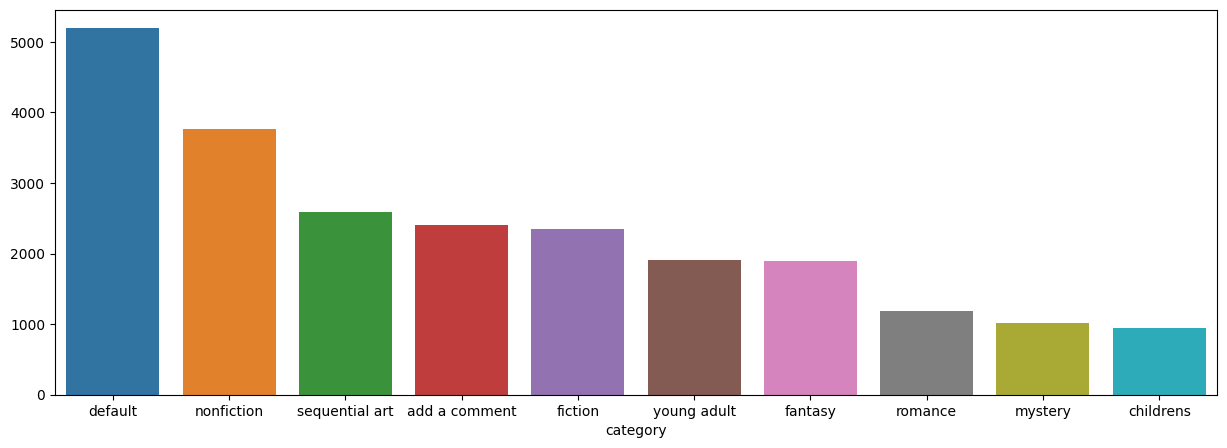

In [26]:
category_sum = data.groupby('category')['price'].sum().sort_values(ascending=False)
plt.figure(figsize=(15,5))
top_10 = category_sum.head(10)
sns.barplot(x=top_10.index, y=top_10.values)
plt.show()

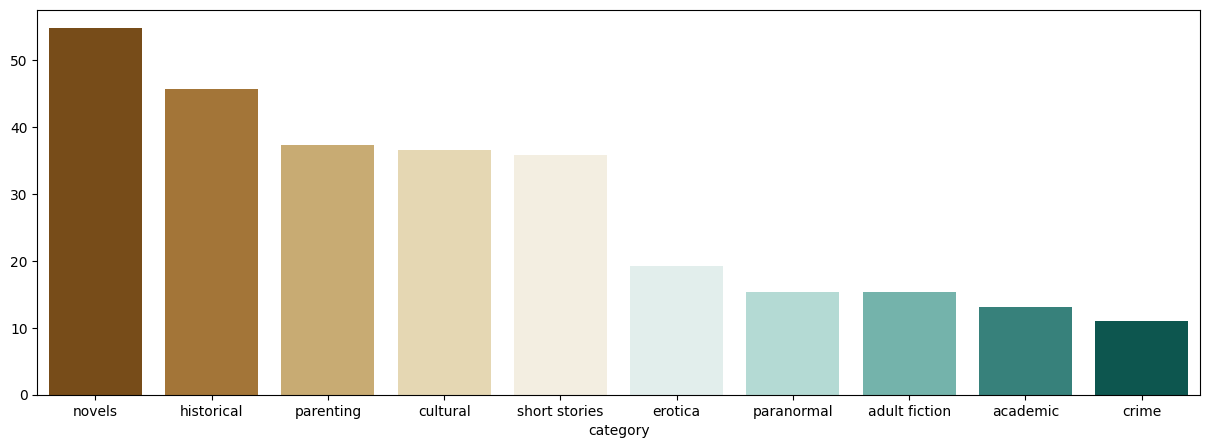

In [28]:
category_sum = data.groupby('category')['price'].sum().sort_values(ascending=False)
plt.figure(figsize=(15,5))
top_10 = category_sum.tail(10)
sns.barplot(x=top_10.index, y=top_10.values,palette=("BrBG"))
plt.show()

### Q3. Check the price at which the books are sold?

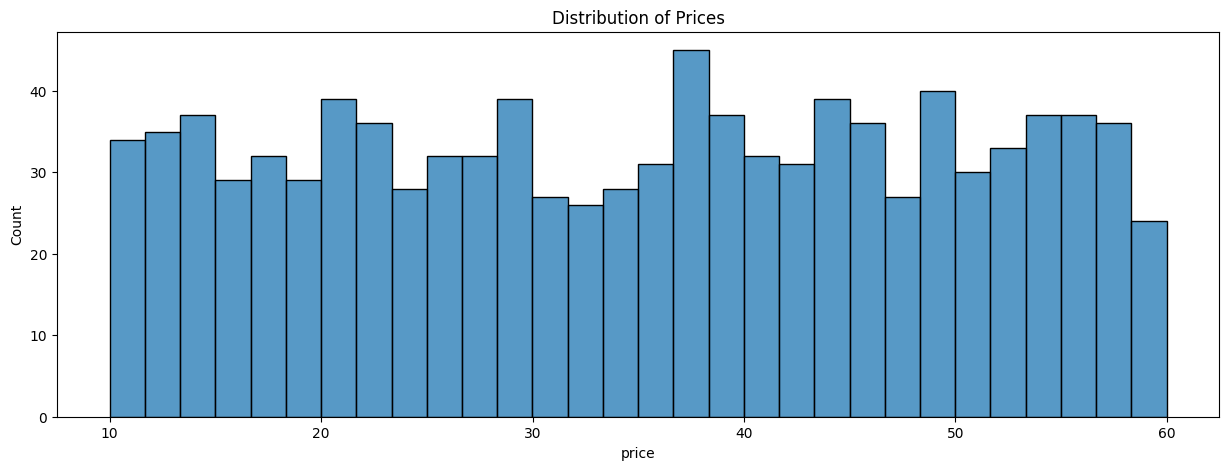

In [29]:
plt.figure(figsize=(15,5))
sns.histplot(data['price'], bins=30)
plt.title("Distribution of Prices")
plt.show()

<Axes: xlabel='stars', ylabel='count'>

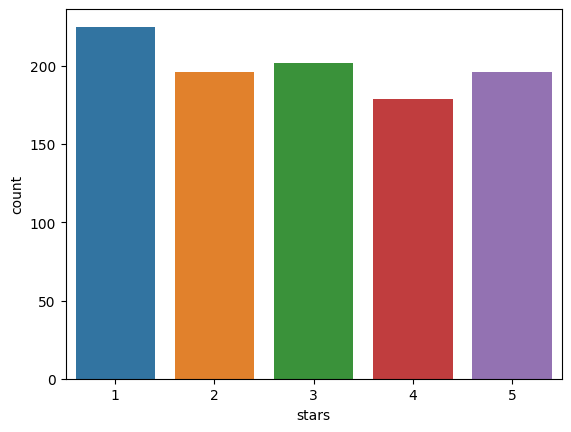

In [30]:
sns.countplot(x='stars', data=data)

In [31]:
data.groupby('category')['stars'].agg({'min', 'max', 'mean'})

,min,mean,max
category,,,
academic,2,2.000000,2
add a comment,1,2.761194,5
adult fiction,5,5.000000,5
art,2,3.625000,5
autobiography,1,3.000000,5
biography,1,2.200000,3
business,1,2.916667,5
childrens,1,2.620690,5
christian,1,2.666667,5


### Q4. Find the total price of books based on the star rating?

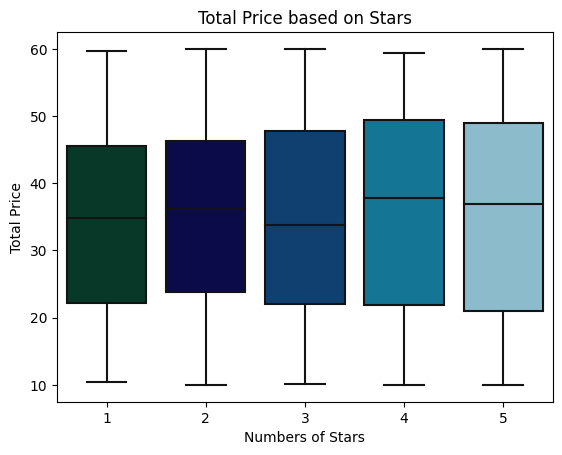

In [32]:
sns.boxplot(x='stars', y='price', palette='ocean', data=data)
plt.xlabel('Numbers of Stars')
plt.ylabel('Total Price')
plt.title('Total Price based on Stars')
plt.show()

### Q5. Which category has the highest price for a book?

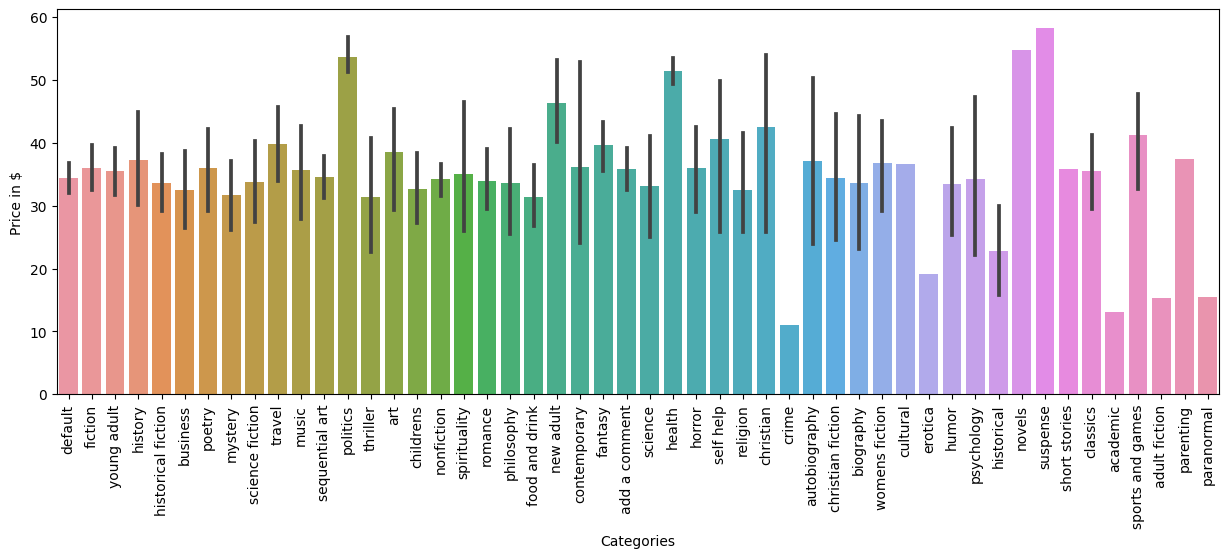

In [8]:
plt.figure(figsize=(15,5))
sns.barplot(x='category', y='price', data=data)
plt.xlabel('Categories')
plt.ylabel('Price in $')
plt.xticks(rotation=90)
plt.show()

### Q6. What's the highest availability of books based on categories?

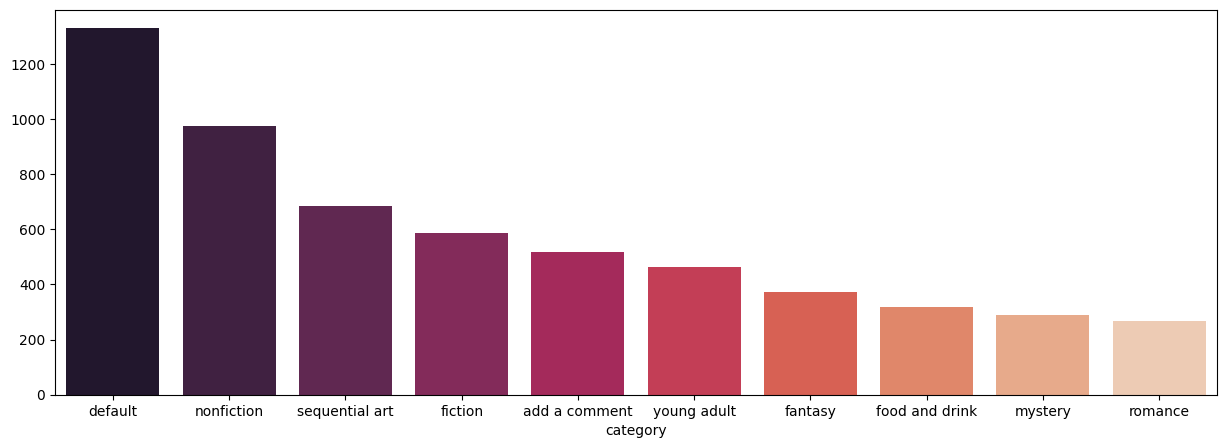

In [45]:
availability_sum=data.groupby('category')['availability'].sum().sort_values(ascending=False)
top_10_categories = availability_sum.head(10)
plt.figure(figsize=(15,5))
sns.barplot(x=top_10_categories.index, y=top_10_categories.values,palette=("rocket"))
plt.show()